In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def maze_parameters():
  # Size of the maze 
  width = 40
  height = 20

  # Colors
  start_color = "green"
  goal_color = "red"
  path_found_color = "yellow"

  # Defines the path from start to end of the maze
  start = (1, 1) # (1, 1) by default
  goal = (height-2, width-2) # (height-2, width-2) by default

  # Defines a percentage of walls apparition
  # The closer the number is to 0, the fewer walls there are, the closer the number is to 1, the more walls there are
  # 0.3 seems to be an appropriate value in order to execute the code without so much error 
  walls_apparition = 0.3

  return width, height, start_color, goal_color, path_found_color, start, goal, walls_apparition

In [3]:
# Generate maze randomly by considering 1 = wall et 0 = empty wall
def generate_maze():
    maze = np.ones((height, width), dtype=int)
    maze[1:-1, 1:-1] = 0
    maze[0, :] = 1
    maze[-1, :] = 1
    maze[:, 0] = 1
    maze[:, -1] = 1
    for row in range(1, height-1):
        for col in range(1, width-1):
            if random.random() < walls_apparition :     
                maze[row, col] = 1
    return maze

In [4]:
# Display the maze
def draw_maze(maze, start=None, goal=None, path=None, title=None):
    plt.imshow(maze, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if start is not None:
        plt.scatter(start[1], start[0], marker="o", s=100, c=start_color)
    if goal is not None:
        plt.scatter(goal[1], goal[0], marker="o", s=100, c=goal_color)
    if path is not None:
        plt.plot([p[1] for p in path], [p[0] for p in path], color=path_found_color, linewidth=3)
    if title is not None:
        plt.title(f"{title}")
    plt.show()

In [5]:
# Converts the maze matrix into a NetworkX graph
def maze_to_graph(maze):
    G = nx.Graph()
    for row in range(height):
        for col in range(width):
            if maze[row, col] == 0:
                node = (row, col)
                G.add_node(node)
                if row > 0 and maze[row-1, col] == 0:
                    neighbor = (row-1, col)
                    G.add_edge(node, neighbor)
                if col > 0 and maze[row, col-1] == 0:
                    neighbor = (row, col-1)
                    G.add_edge(node, neighbor)
    return G

In [6]:
# This function is for the A* algorithm with heuristic
def manhattan_geometry(start, goal):
    (x1, y1) = start
    (x2, y2) = goal
    heuristic = abs(x1 - x2) + abs(y1 - y2)
    return heuristic

In [8]:
def find_shortest_path_algorithm(maze, start, goal):
  if start == goal:
        raise ValueError("Start and Goal are the same!")

  G = maze_to_graph(maze)
  try:
      # A* algorithm with heuristic, A* algorithm without heuristic, Bellman-Ford algorithm, Dijkstra algorithm 
      path_astar_heuristic = nx.astar_path(G, start, goal, manhattan_geometry)
      path_astar_no_heuristic = nx.astar_path(G, start, goal)
      path_bellman_ford = nx.bellman_ford_path(G, start, goal)
      path_dijkstra = nx.dijkstra_path(G, start, goal)
      return path_astar_heuristic, path_astar_no_heuristic, path_bellman_ford, path_dijkstra
  except nx.NodeNotFound as e:
      if start not in G.nodes:
          raise ValueError(f"Error: the starting node {start} is not present in the wall")
      elif goal not in G.nodes:
          raise ValueError(f"Error: the goal node {goal} is not present in the wall")

In [10]:
def display_maze_solution():
  #draw_maze(maze, start=None, goal=None, path=None, title="Generate maze randomly") # If you want to display the maze before the pathfinding
  #print()
  draw_maze(maze, start, goal, path_astar_heuristic,"The solution of the maze using A* algorithm with heuristic")
  print()
  draw_maze(maze, start, goal, path_astar_no_heuristic, "The solution of the maze using A* algorithm without heuristic")
  print()
  draw_maze(maze, start, goal, path_bellman_ford, "The solution of the maze using Bellman-Ford algorithm")
  print()
  draw_maze(maze, start, goal, path_dijkstra, "The solution of the maze using Dijkstra algorithm")
  print()

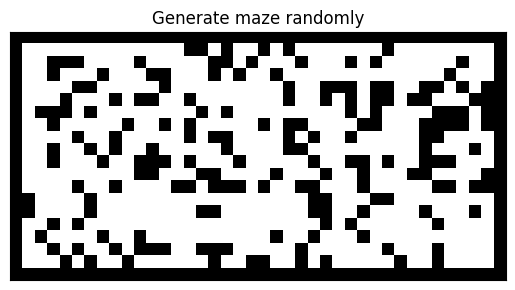

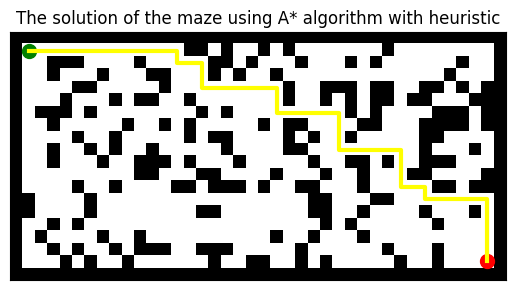

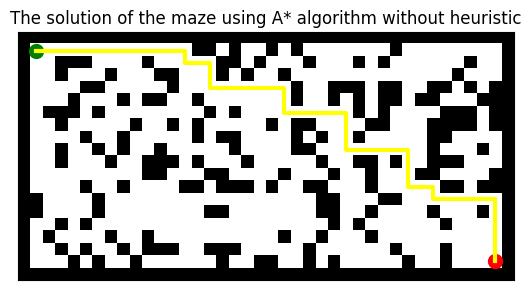

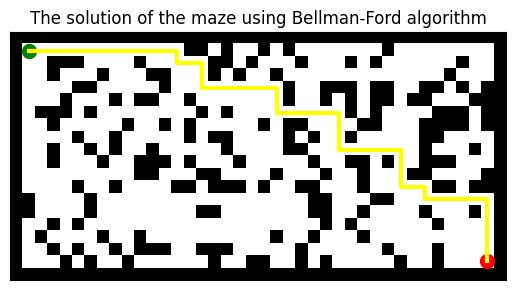

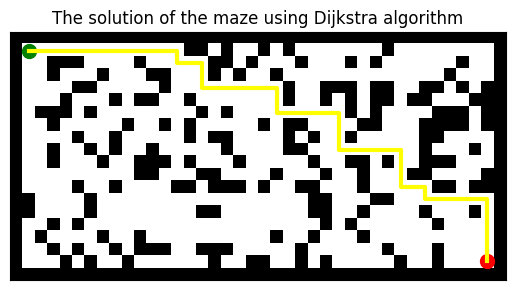

In [11]:
if __name__ == "__main__":
  # Parameters for the maze
  width, height, start_color, goal_color, path_found_color, start, goal, walls_apparition = maze_parameters()

  # Generate maze
  maze = generate_maze()

  # Draw maze without path
  draw_maze(maze, start=None, goal=None, path=None, title="Generate maze randomly")
  print()
  
  # Call the function with all shortest path algorithm (A* with and withou heuristic, Bellman-Ford, Dijkstra)
  path_astar_heuristic, path_astar_no_heuristic, path_bellman_ford, path_dijkstra = find_shortest_path_algorithm (maze, start, goal)

  # Call the display functions
  display_maze_solution()